In [104]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure
import seaborn as sns
sns.set_palette("colorblind")
palette = sns.color_palette("colorblind")

In [105]:
# read in dataset a to dataset_a dataframe
dataset_a = pd.read_csv('tasksheetdataa.csv')

In [106]:
# read in dataset z to dataset_z dataframe
dataset_z = pd.read_csv('tasksheetdataz.csv')

In [107]:
# remove unneeded columns from dataset a
dataset_a = dataset_a.drop(columns=['fileid', 'chariter', 'cifsn', 'logrecno', 'sumlev', 'geocomp', 'areawatr', 'name', 'funcstat', 'hu100', 'intptlat', 'intptlon', 'lsadc'])

In [108]:
# remove unneeded columns from dataset z
dataset_z = dataset_z.drop(columns=['county', 'county_fips', 'community', 'community_code', 'accuracy'])

In [109]:
# rename column 'zcta5' in dataset a to 'zip' to make the column name consistent between datasets
dataset_a = dataset_a.rename(columns={'zcta5':'zip'})

In [110]:
# drop 'stusab' column on dataset a since it isn't actually the state abbreviation - it's probably mislabeled as every row is 'US'
dataset_a = dataset_a.drop(columns = {'stusab'})

In [111]:
# there are 41469 rows in dataset_z
dataset_z['zip'].count()

# there are 33120 rows in dataset_a
dataset_a['zip'].count()

33120

In [112]:
# Inner join data sets on zip column to connect state data to zip codes
joined = pd.merge(left = dataset_z, right = dataset_a, how = 'inner', on = 'zip')
joined.head()

# new joined dataframe has 32974 rows - it doesn't contain every row from either dataset (a or z)
joined['zip'].count()

32974

#### a) Texas has the most 5-digit zip codes with a total of 1935. 

In [113]:
# convert zip column to string so that the length can be used
joined['zip'] = joined['zip'].astype('str')
joined.head()

,country,zip,city,state,stusab,latitude,longitude,p0010001,arealand,pop100
0,US,99553,Akutan,Alaska,AK,54.1430,-165.7854,1027,35823298,1027
1,US,99571,Cold Bay,Alaska,AK,55.1858,-162.7211,160,76206560,160
2,US,99583,False Pass,Alaska,AK,54.8542,-163.4113,35,33061429,35
3,US,99612,King Cove,Alaska,AK,55.0628,-162.3056,938,30280355,938
4,US,99661,Sand Point,Alaska,AK,55.3192,-160.4914,978,460666008,978


In [114]:
# create a subset of data where the zips are all five digits
five_bool = joined['zip'].str.len() == 5
five = joined.loc[five_bool]

In [115]:
five.max()

country               US
zip                99929
city              Zwolle
latitude         71.2346
longitude        -71.944
p0010001          113916
arealand     34786101507
pop100            113916
dtype: object

In [116]:
# there are 30547 rows in 'five'
five.count()

# create a new dataframe that lists each unique zip alongside the state name in an array
five_unique = five.groupby(['stusab'])['zip'].unique().reset_index()

In [117]:
# create a new column in the dataframe that counts the number of items in the array
five_unique['unique_zip_counts']=[len(i) for i in five_unique['zip']]

# find the maximum number of unique zips
fmax = five_unique['unique_zip_counts'].max()

# find the state that has the maximum number of unique zips
most_uniques = five_unique[five_unique['unique_zip_counts'] == fmax]

# display state and zip info
most_uniques

,stusab,zip,unique_zip_counts
37,TX,"[75763, 75779, 75801, 75803, 75832, 75839, 758...",1935


### b) 

### i. ### Montauk, NY has the most easterly zip (11954)

In [118]:
# this creates a series that shows the maximum longitude per zip code 
easterly = five.groupby(['zip'])['longitude'].max().max()
easterly

-71.944

In [119]:
most_easterly_zip = five[five.longitude == easterly]

In [120]:
most_easterly_zip

,country,zip,city,state,stusab,latitude,longitude,p0010001,arealand,pop100
21476,US,11954,Montauk,New York,NY,41.0459,-71.944,3326,47942719,3326


------------------------

### ii. ### Makaweli, Hawaii has the most westerly zip (96769) when Alaska is excluded

In [121]:
# task b - excluding Alaska, find the most westerly zip code
westerly_no_ak = five[(five['stusab'] != 'AK')].longitude.min()
westerly_no_ak
most_westerly_not_ak = five[five.longitude == westerly_no_ak]
most_westerly_not_ak

,country,zip,city,state,stusab,latitude,longitude,p0010001,arealand,pop100
6360,US,96769,Makaweli,Hawaii,HI,21.9454,-159.9214,464,193525234,464


---------------------

### iii. Barrow, Alaska has the most northerly zip (99723)

In [122]:
northerly = five['latitude'].max()
northerly

71.2346

In [123]:
most_northerly = five[five.latitude == northerly]
most_northerly

,country,zip,city,state,stusab,latitude,longitude,p0010001,arealand,pop100
154,US,99723,Barrow,Alaska,AK,71.2346,-156.8174,4213,53780612,4213


-------------

## c)  Washington DC has the zip code with the highest population density: 20052

In [124]:
# create a new column 'pop_density,' which is a measure of population divided by land area
five['pop_density'] = five.pop100/five.arealand

# find the highest density value
highest_density = five['pop_density'].max()

#return all columns where the population density is the highest
high_density_zip = five[five.pop_density == highest_density]
high_density_zip

/Users/emmakeefe/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,country,zip,city,state,stusab,latitude,longitude,p0010001,arealand,pop100,pop_density
4467,US,20052,Washington,District of Columbia,DC,38.9001,-77.0479,470,7062,470,0.066553


--------

### d) 

### i.  There are 449 3-digit zip codes that are used in 2 or more states. Some examples are 467, 708, and 376.

In [125]:
#convert 5-digit ZIPs to 3-digit ZIPs
joined.head()

,country,zip,city,state,stusab,latitude,longitude,p0010001,arealand,pop100
0,US,99553,Akutan,Alaska,AK,54.1430,-165.7854,1027,35823298,1027
1,US,99571,Cold Bay,Alaska,AK,55.1858,-162.7211,160,76206560,160
2,US,99583,False Pass,Alaska,AK,54.8542,-163.4113,35,33061429,35
3,US,99612,King Cove,Alaska,AK,55.0628,-162.3056,938,30280355,938
4,US,99661,Sand Point,Alaska,AK,55.3192,-160.4914,978,460666008,978


In [126]:
# create a new column in joined that truncates zip codes to the first three digits
joined['zip3'] = joined['zip'].str.slice(0,3)

In [127]:
# create a dataframe with the number of unqiue states per zip code
states_zips = joined.groupby(['zip3'])['stusab'].nunique().reset_index()

# create another dataframe that filters out any zip codes that only have one state associated with it
states_zips_multi = states_zips[states_zips['stusab'] != 1]

# count the number of zip codes that are associated with 2 or more states
states_zips_multi.count()

zip3      449
stusab    449
dtype: int64

------

### e)

In [128]:
# Exclude zip codes associated with multiple states from the joined dataframe
joined['zip3'].isin(states_zips_multi['zip3'])

# inverse of the boolean series above
joined['zip3'].isin(states_zips_multi['zip3'])

# update the 'joined' dataframe so that it no longer includes zip codes associated with more than one state
joined = joined[~joined['zip3'].isin(states_zips_multi['zip3'])]

# check to see if the above did what was intended, which was to remove zips used in more than one state
# this should return a count of 57, since this was not removed from the 'joined' dataframe
joined.query("zip3 == '995'").count()

# this should return a count of 0, since it was removed from the 'joined' dataframe
joined.query("zip3 == '708'").count()

country      0
zip          0
city         0
state        0
stusab       0
latitude     0
longitude    0
p0010001     0
arealand     0
pop100       0
zip3         0
dtype: int64

### i) There are 831 zip codes that have populations between 10 and 20000 residents.

In [129]:
# query for populations between 10 and 20000 that have a 3-digit ZIP code
# 27040 results 

small_pop_zips = joined.loc[(joined['pop100'] > 9) & (joined['pop100'] <= 20000) & (joined['zip3'] is not None)].reset_index()
# small_pop_zips.count()

In [130]:
# 10756 rows in this dataframe
small_pop_zips.count()

index        10756
country      10756
zip          10756
city         10756
state        10754
stusab       10754
latitude     10756
longitude    10756
p0010001     10756
arealand     10756
pop100       10756
zip3         10756
dtype: int64

In [131]:
# The above list has zip codes listed multiple times, so we need to find the number of unique zip codes that meet the population criteria
unique_small_pop_zips = small_pop_zips.groupby(['zip3'])['zip3'].nunique().count()

In [132]:
# this shows the total number of unique zip codes that have populations between 10 and 20000 residents
# 382 total
unique_small_pop_zips

382

### f) Distribution of 3 and 5-digit populations

In [133]:
# create a new column 'pop_density,' which is a measure of population divided by land area
small_pop_zips['pop_density'] = small_pop_zips.pop100/small_pop_zips.arealand

Text(0, 0.5, 'Frequency')

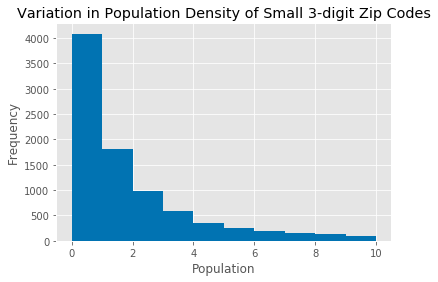

In [134]:
plt.hist(small_pop_zips['pop_density']*100000, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
plt.title("Variation in Population Density of Small 3-digit Zip Codes")
plt.xlabel('Population')
plt.ylabel('Frequency')

#### iii. Alaska's 997 has the lowest density population of the three-digit zip codes in this dataset. Only 30 people live in the zip code and it appears to be a fairly large area, so this makes sense.

In [135]:
# find the lowest density value
lowest_density = small_pop_zips['pop_density'].min()


#return all columns where the population density is the lowest
lowest_density_zip = small_pop_zips[small_pop_zips.pop_density == lowest_density]
lowest_density_zip

,index,country,zip,city,state,stusab,latitude,longitude,p0010001,arealand,pop100,zip3,pop_density
204,218,US,99726,Bettles Field,Alaska,AK,65.2264,-151.0251,30,5947543601,30,997,5.044099e-09


In [136]:
five.head()

,country,zip,city,state,stusab,latitude,longitude,p0010001,arealand,pop100,pop_density
0,US,99553,Akutan,Alaska,AK,54.1430,-165.7854,1027,35823298,1027,0.000029
1,US,99571,Cold Bay,Alaska,AK,55.1858,-162.7211,160,76206560,160,0.000002
2,US,99583,False Pass,Alaska,AK,54.8542,-163.4113,35,33061429,35,0.000001
3,US,99612,King Cove,Alaska,AK,55.0628,-162.3056,938,30280355,938,0.000031
4,US,99661,Sand Point,Alaska,AK,55.3192,-160.4914,978,460666008,978,0.000002


In [137]:
# create a dataframe of population grouped by 3-digit zip
three = joined.groupby(['zip3'])['pop100'].sum().reset_index()

Text(0, 0.5, 'Frequency')

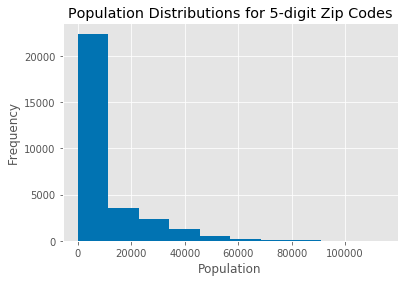

In [138]:

plt.hist(five['pop100'])
plt.title("Population Distributions for 5-digit Zip Codes")
plt.xlabel('Population')
plt.ylabel('Frequency')


Text(0, 0.5, 'Frequency')

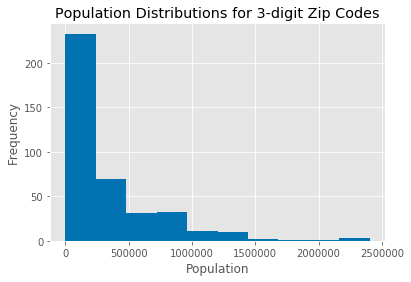

In [139]:
plt.hist(three['pop100'])
plt.title("Population Distributions for 3-digit Zip Codes")
plt.xlabel('Population')
plt.ylabel('Frequency')

In [140]:
five.count()

country        30547
zip            30547
city           30547
state          30545
stusab         30545
latitude       30547
longitude      30547
p0010001       30547
arealand       30547
pop100         30547
pop_density    30547
dtype: int64

In [141]:
five.head()

,country,zip,city,state,stusab,latitude,longitude,p0010001,arealand,pop100,pop_density
0,US,99553,Akutan,Alaska,AK,54.1430,-165.7854,1027,35823298,1027,0.000029
1,US,99571,Cold Bay,Alaska,AK,55.1858,-162.7211,160,76206560,160,0.000002
2,US,99583,False Pass,Alaska,AK,54.8542,-163.4113,35,33061429,35,0.000001
3,US,99612,King Cove,Alaska,AK,55.0628,-162.3056,938,30280355,938,0.000031
4,US,99661,Sand Point,Alaska,AK,55.3192,-160.4914,978,460666008,978,0.000002


In [142]:
three.count()

zip3      393
pop100    393
dtype: int64

In [143]:
three.head()

,zip3,pop100
0,113,1170817
1,114,728928
2,116,114978
3,117,1565949
4,118,72690
